<a href="https://colab.research.google.com/github/Rashimanish/ML_XGBoost_California_Housing/blob/main/Hosue_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
#importing boston house price data
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
#Loading the dataset to a pandas data frame
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
#add the target column in the data frame
house_price_dataframe['price'] = house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
house_price_dataframe.shape

(20640, 9)

In [ ]:
#check for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [ ]:
#stastical measures

house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
#understanding the corelations
#1. Positive Correlation and Negative Correlation
correlation = house_price_dataframe.corr()

<Axes: >

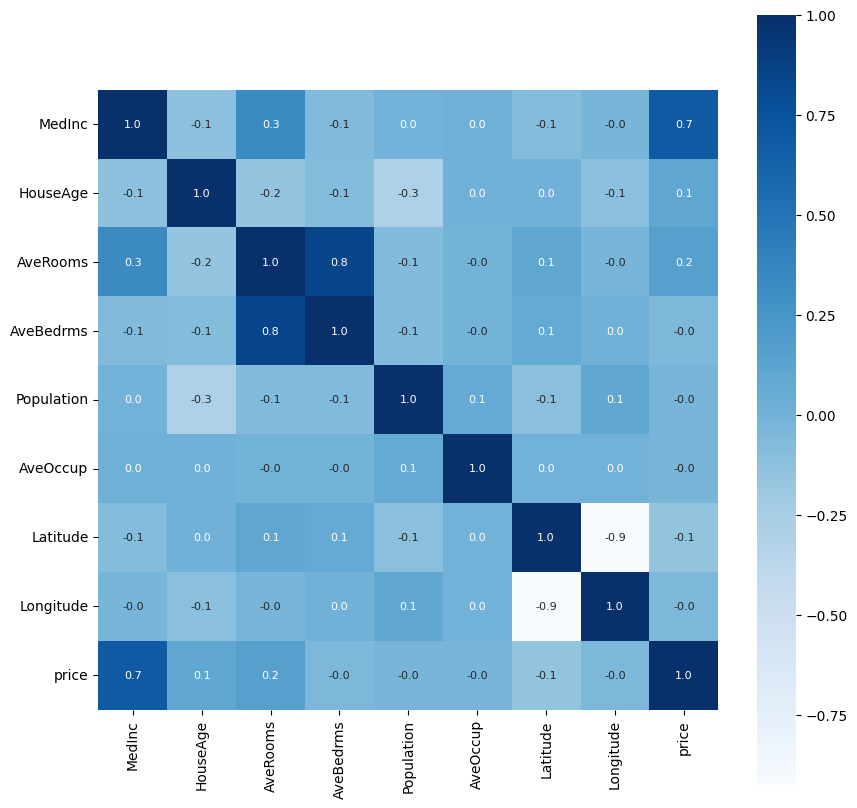

In [ ]:
#constructing a heat map to understand correlation
#cbar -> color bar in the side , square --> the squares , fmt --> floating point inside the square , annot--> featurenames in the x and y axis
#annot_kws ---> font sizes , cmap --> color of the heat map
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True,fmt='.1f', annot =True, annot_kws={'size':8},cmap='Blues')


In [ ]:
#splitting the data and Target
#if dropping coloum axis is 1 and if dropping row axis is 0

X = house_price_dataframe.drop(['price'],axis=1)
Y= house_price_dataframe['price']
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

In [ ]:
#splitting data to test and train

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_test.shape,X_train.shape)

(20640, 8) (4128, 8) (16512, 8)


In [ ]:
#Model Training
#XGBoost Regression Model (decison tree based)
#Ensemble mode --> incoporates more than one model
#loading the model

model = XGBRegressor()


In [ ]:
#training the model with X_train

model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Evaluation
#we cannot use acuracy score for regression problems , where we find the difference between correctly predicted and the original
#regression problems all output are numberical values so we cannot use accuracy score
#Prediction of Trainning data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [ ]:
#R squared error
#will find the variance between trained data prediuction abnd actual data --> Y_data
score_1 = metrics.r2_score(Y_train,training_data_prediction)

#Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print(score_1 ,"R Squared error") # closest to zero or 1 the model is okay , around 10 or mre than 10 not okay
print(score_2 ,"absoulte mean error") #below output shows our model is functioning well

0.943650140819218 R Squared error
0.1933648700612105 absoulte mean error


In [ ]:
#prediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
#R squared error
#will find the variance between trained data prediuction abnd actual data --> Y_data
score_15 = metrics.r2_score(Y_test,test_data_prediction)

#Mean Absolute Error
score_20 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print(score_15 ,"R Squared error") # closest to zero or 1 the model is okay , around 10 or mre than 10 not okay
print(score_20 ,"absoulte mean error") #below output shows our model is functioning well

0.8338000331788725 R Squared error
0.3108631800268186 absoulte mean error


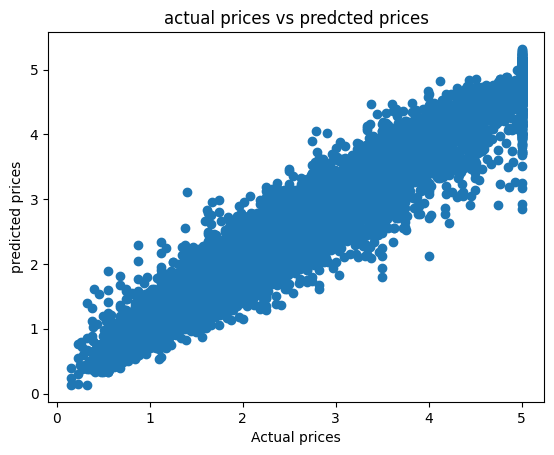

In [ ]:
#visualize the actual prices with predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predcted prices")
plt.show()
#according to the graph....closness can be seen